In [52]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline
sns.set_context(rc={'figure.figsize': (16,12)})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [53]:
# Import dataset
df = pd.read_csv('df1.csv')
df.head(5)
df = df[['logerror','zip']]
df
# df.zip.value_counts()

,Unnamed: 0,index_orig,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,latitude,...,county,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,area_living
0,0,4176,12658092,0.0507,2016-01-21,2016,1,2.0,2,33339295.0,...,3101.0,96207,0.0,1978,165947.0,327635.0,2015,161688.0,5433.63,1703
1,1,11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2,33340045.0,...,3101.0,96207,0.0,1920,300894.0,545689.0,2015,244795.0,7949.83,865
2,2,60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3,33340134.0,...,3101.0,96207,0.0,1996,265712.0,398565.0,2015,132853.0,6174.19,1500
3,3,38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2,33340239.0,...,3101.0,96207,0.0,1964,89781.0,139956.0,2015,50175.0,3036.02,1422
4,4,72995,12659124,0.0421,2016-09-02,2016,9,2.0,2,33340508.0,...,3101.0,96207,0.0,1965,103700.0,271000.0,2015,167300.0,5934.02,902


,logerror,zip
0,0.050700,96207
1,-0.166100,96207
2,-0.047100,96207
3,-0.018200,96207
4,0.042100,96207
5,0.049700,96207
6,0.145800,96207
7,0.107100,96207
8,0.077000,96207
9,0.438300,96207


In [54]:
from sklearn.model_selection import train_test_split
Z = pd.DataFrame(df.zip)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Z, df.logerror, test_size = 0.3, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
pred = lm.predict(Xtest)
pred

array([ 0.01045474,  0.01037431,  0.01042846, ...,  0.01041789,
        0.01044143,  0.01044052])

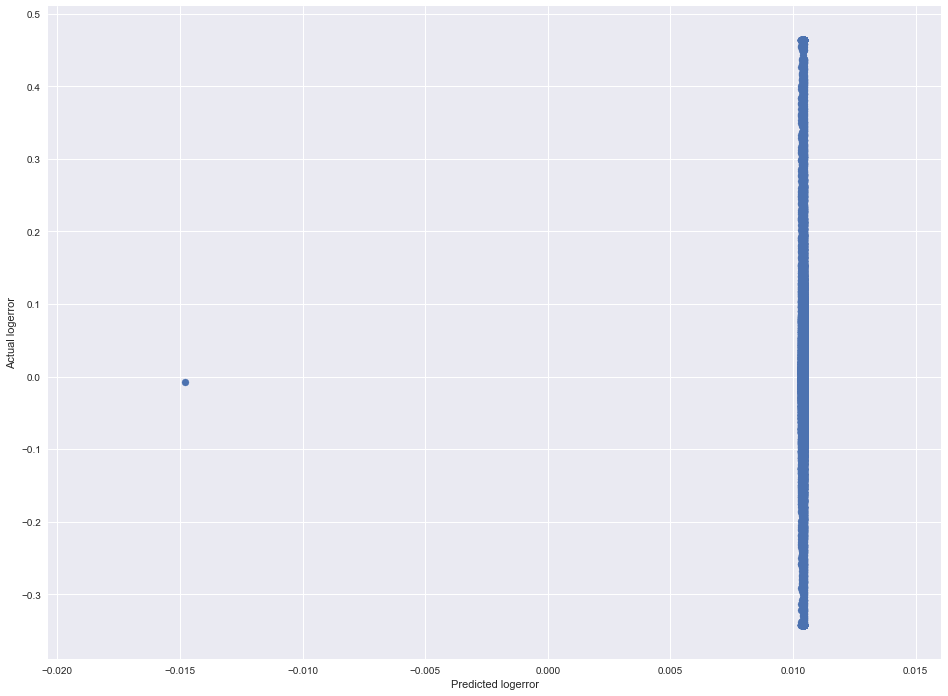

In [57]:
plt.scatter(pred, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error as mse
MSE = mse(Ytest, pred)
MSE

0.010702700037429782

In [59]:
df1 = pd.read_csv('df1.csv')

In [60]:
df1 = df1[['logerror','zip','num_bed','num_bath','area_living','area_lot']]
df1

,logerror,zip,num_bed,num_bath,area_living,area_lot
0,0.050700,96207,2,2.0,1703,2080.0
1,-0.166100,96207,2,2.0,865,1250.0
2,-0.047100,96207,3,3.0,1500,1103.0
3,-0.018200,96207,2,2.0,1422,8934.0
4,0.042100,96207,2,2.0,902,4328.0
5,0.049700,96207,3,2.0,1320,1081.0
6,0.145800,96207,2,2.0,1050,1446.0
7,0.107100,96207,3,2.0,1080,1121.0
8,0.077000,96207,4,2.0,1266,1032.0
9,0.438300,96207,3,4.0,1864,1899.0


In [61]:
from sklearn.model_selection import train_test_split
Z = df1.drop(['logerror'], axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Z, df1.logerror, test_size = 0.3, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
pred1 = lm.predict(Xtest)
pred1

array([ 0.0087862 ,  0.00631598,  0.01610746, ...,  0.01130471,
        0.00748721,  0.00464672])

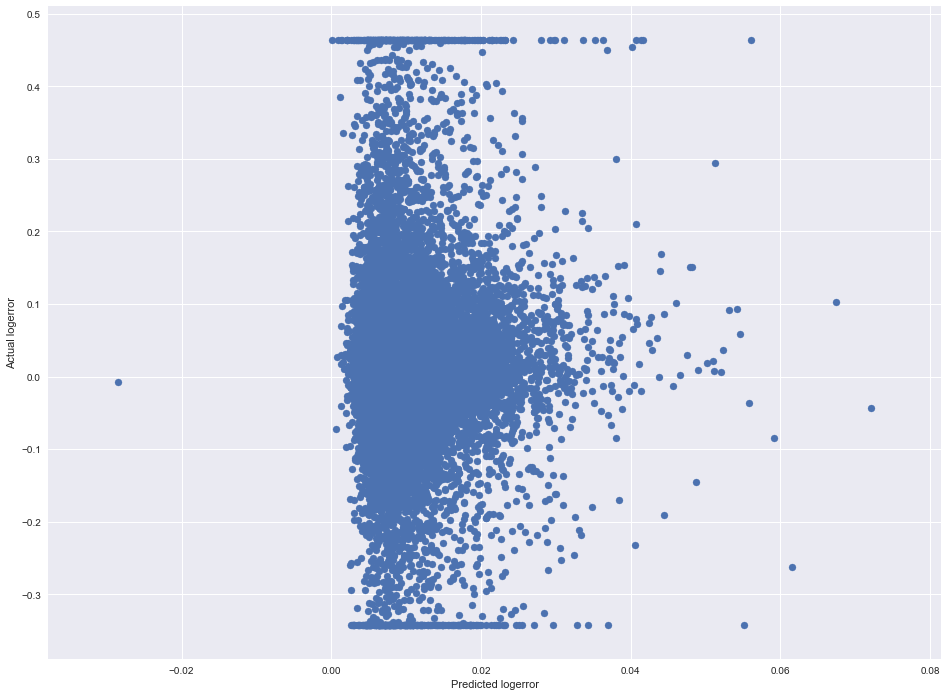

In [64]:
plt.scatter(pred1, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error as mse
MSE = mse(Ytest, pred1)
MSE

0.010687138677080535

In [66]:
# Decision trees

from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor(max_depth=2)
dt5 = DecisionTreeRegressor(max_depth=5)

fit1 = dt2.fit(Xtrain, Ytrain)
fit2 = dt5.fit(Xtrain, Ytrain)

In [67]:
pred2 = dt2.predict(Xtest)
pred3 = dt5.predict(Xtest)

In [68]:
pred1

array([ 0.0087862 ,  0.00631598,  0.01610746, ...,  0.01130471,
        0.00748721,  0.00464672])

In [69]:
pred2

array([ 0.00161227,  0.01131894,  0.01131894, ...,  0.01131894,
        0.01131894,  0.01131894])

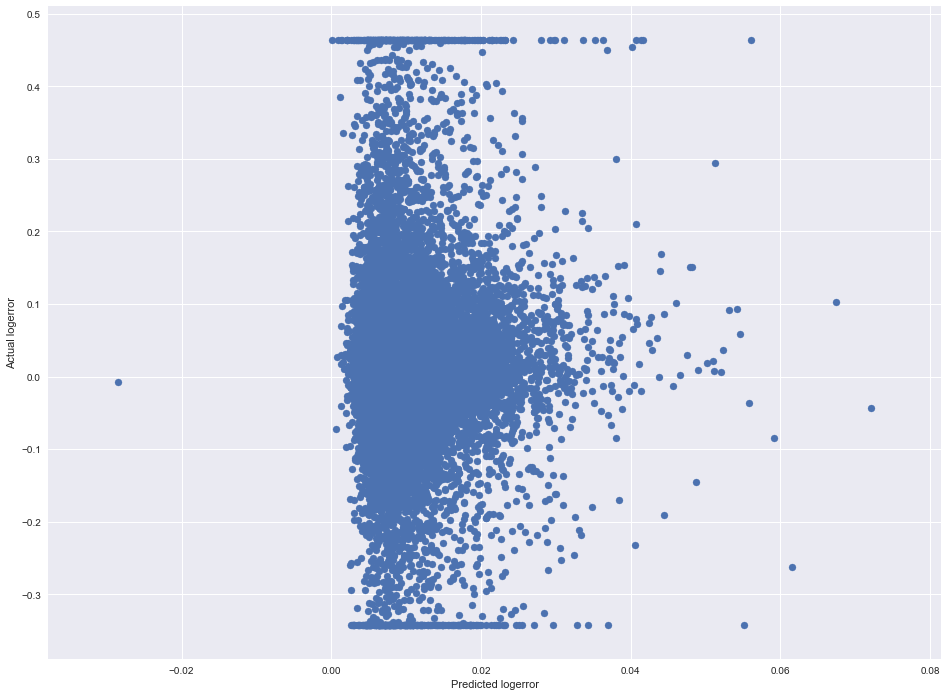

In [70]:
plt.scatter(pred1, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

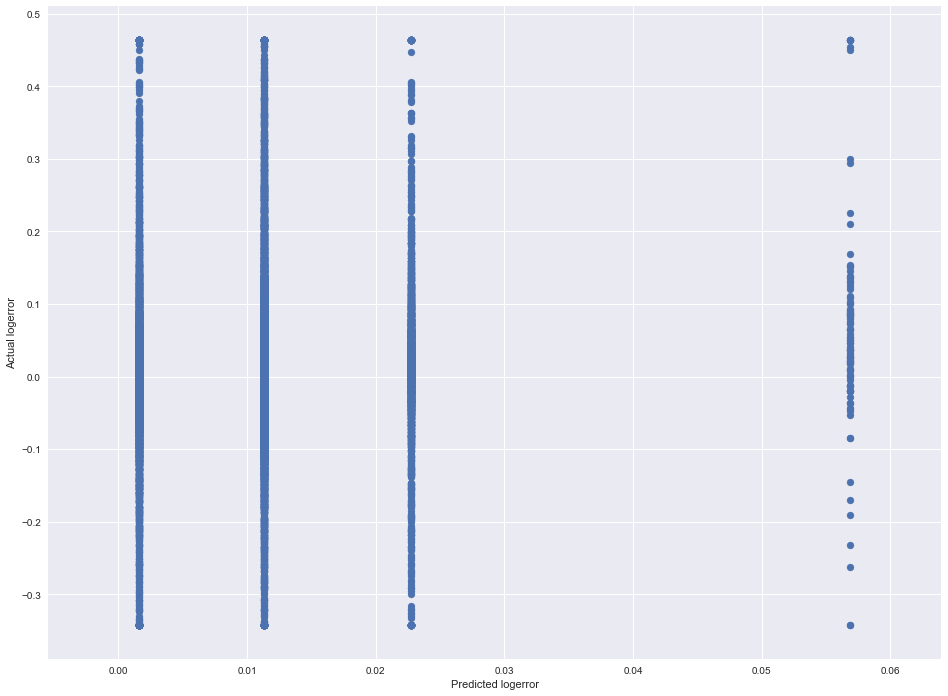

In [71]:
plt.scatter(pred2, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [75]:
# Decision Tree with AdaBoost

import numpy as np
rng = np.random.RandomState(1)

from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(dt5, n_estimators=300, random_state=rng)

In [76]:
fit4 = regressor.fit(Xtrain, Ytrain)
pred4 = fit4.predict(Xtest)
pred4

array([ 0.04320915,  0.04320915,  0.04320915, ...,  0.04320915,
        0.04320915,  0.05180493])

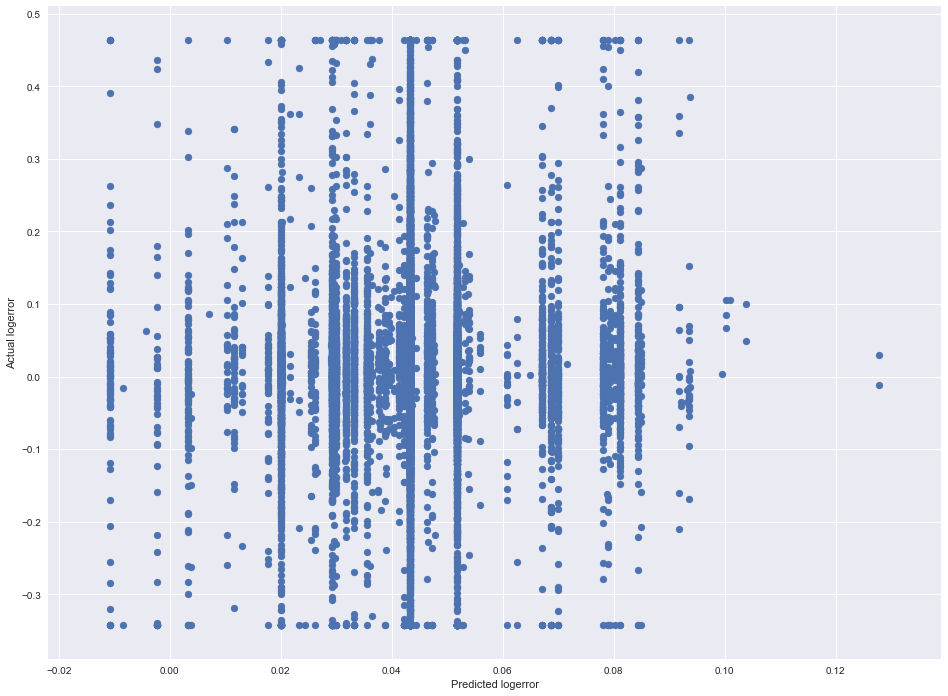

In [77]:
plt.scatter(pred4, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [82]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain, Ytrain)
pred5 = rf.predict(Xtest)
pred5

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

array([ 0.00128   , -0.01579   ,  0.10862376, ..., -0.00867   ,
        0.02944   ,  0.01154   ])

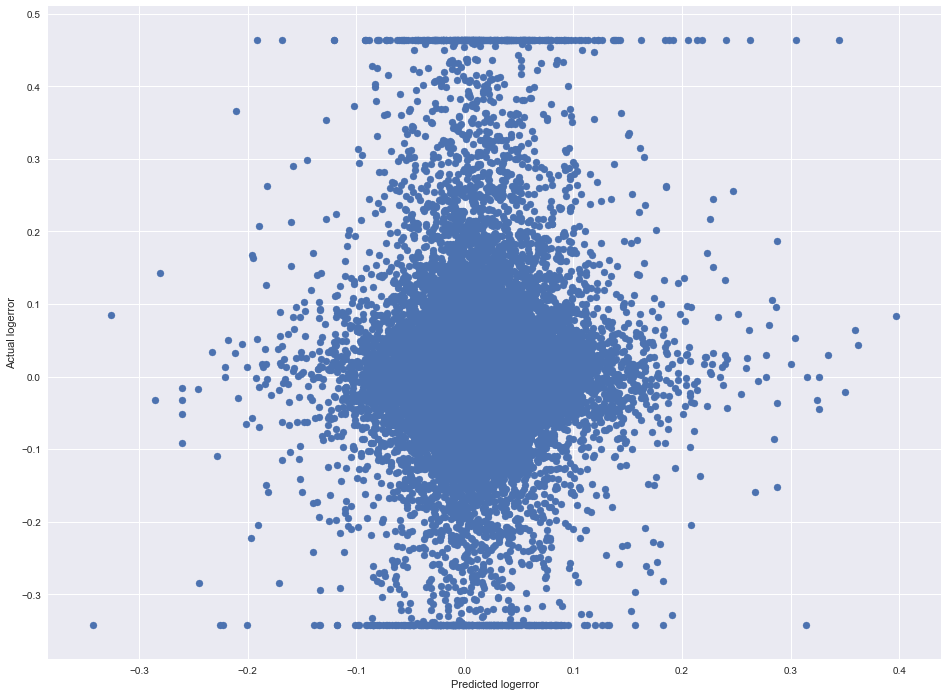

In [84]:
plt.scatter(pred5, Ytest)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [87]:
rf.feature_importances_

array([ 0.20967071,  0.05799606,  0.05456271,  0.32626517,  0.35150536])

In [88]:
rf.predict([[96207,3,3.0,1500,1103.0]])

array([-0.03751])